In [10]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv("../fin_health.csv")

In [12]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['ID', 'Target'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [13]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [14]:
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

In [15]:
# Dictionary of replacements for multiple columns
replacements = {
    'has_loan_account': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'has_mobile_money': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'has_credit_card': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'perception_insurance_companies_dont_insure_businesses_like_yours': {
        "Don't Know": "Don't know"
    },
    'has_internet_banking': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'has_debit_card': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'medical_insurance': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'funeral_insurance': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'uses_friends_family_savings': {
        "Used to have but don't have now": "Used to have but don’t have now"
    },
    'uses_informal_lender': {
        "Used to have but don't have now": "Used to have but don’t have now"
    }
}


# Apply replacements in one line
X_train = X_train.replace(replacements)
X_test = X_test.replace(replacements)

# Fill missing values

In [16]:
X_train[cat_cols] = X_train[cat_cols].fillna('Unknown')
X_test[cat_cols] = X_test[cat_cols].fillna('Unknown')

In [17]:
X_train['current_problem_cash_flow'].unique()

array(['Yes', 'Unknown', 'No', '0'], dtype=object)

This need special treatment

In [18]:
# print(X_train['attitude_worried_shutdown'].value_counts())
# print(X_train['current_problem_cash_flow'].value_counts())

# New Features

In [19]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def plot_cat_target_dist(X, y, cols, n_cols_per_row=3, figsize=(18, 5)):
    """
    Plot stacked normalized target distributions for multiple categorical columns.
    
    Each row contains `n_cols_per_row` plots.
    """

    n_plots = len(cols)
    n_rows = math.ceil(n_plots / n_cols_per_row)

    fig, axes = plt.subplots(
        n_rows,
        n_cols_per_row,
        figsize=(figsize[0], figsize[1] * n_rows)
    )

    # Flatten axes for easy iteration
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ct = pd.crosstab(
            X[col],
            y,
            normalize='index'
        )

        ct.plot(
            kind='bar',
            stacked=True,
            ax=axes[i],
            legend=False
        )

        axes[i].set_title(f"Target Distribution by {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Proportion")
        axes[i].tick_params(axis='x', rotation=45)

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Global legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        title="Target",
        loc="upper center",
        ncol=len(labels)
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()











In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

def plot_num_fe(X, y, col='cash_flow_ratio'):
    """
    Plots:
    1) KDE distribution by target class using Yeo-Johnson
    2) Overall histogram + KDE

    Yeo-Johnson is fit once on full data (EDA only)
    """

    # Fit transformer (EDA purpose)
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    transformed = pt.fit_transform(X[[col]]).ravel()

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # ===============================
    # 1️⃣ KDE by class
    # ===============================
    for cls in y.unique():
        sns.kdeplot(
            transformed[y == cls],
            label=cls,
            fill=True,
            alpha=0.3,
            ax=axes[0]
        )

    axes[0].set_title('Yeo-Johnson ' + col)
    axes[0].set_xlabel('Yeo-Johnson Transformed')
    axes[0].set_ylabel('Density')
    axes[0].legend(title='Target')

    # ===============================
    # 2️⃣ Overall histogram + KDE
    # ===============================
    sns.histplot(
        transformed,
        bins=50,
        kde=True,
        ax=axes[1]
    )

    axes[1].set_title('Overall Yeo-Johnson Distribution')
    axes[1].set_xlabel('Yeo-Johnson Transformed')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()


In [21]:
record_col = 'keeps_financial_records'

unknown_mapping = {
    "Don’t know or N/A": "Unknown",
    "Don’t know (Do not show)": "Unknown",
    "Don't know": "Unknown",
    "Don?t know / doesn?t apply": "Unknown"
}
record_map = {
    "Refused": 0,
    "Unknown": 0,
    "No": 1,
    "Yes": 2,
    "Yes, always": 3
}
# -------- TRAIN --------
tmp_train = X_train[[record_col]].copy()

tmp_train[record_col] = tmp_train[record_col].replace(unknown_mapping)
X_train['record_keeping_ord'] = tmp_train[record_col].map(record_map).fillna(0)


# -------- TEST --------
tmp_test = X_test[[record_col]].copy()

tmp_test[record_col] = tmp_test[record_col].replace(unknown_mapping)
X_test['record_keeping_ord'] = tmp_test[record_col].map(record_map).fillna(0)



# -------------
formality_cols = [
    'has_credit_card',
    'has_loan_account',
    'has_debit_card',
    'has_internet_banking',
    'has_mobile_money',
    'has_insurance'
]

def have_now_binary(df, cols):
    out = pd.DataFrame(index=df.index)
    for c in cols:
        out[c + '_bin'] = (df[c] == 'Have now').astype(int)
    return out

# TRAIN
tmp_train = have_now_binary(X_train, formality_cols)
X_train['financial_formality_index'] = tmp_train.sum(axis=1)

# TEST
tmp_test = have_now_binary(X_test, formality_cols)
X_test['financial_formality_index'] = tmp_test.sum(axis=1)


# --------------------
insurance_cols = [
    'motor_vehicle_insurance',
    'medical_insurance',
    'funeral_insurance', 
]

# TRAIN
tmp_train = have_now_binary(X_train, insurance_cols)
X_train['insurance_coverage_score'] = tmp_train.sum(axis=1)

# TEST
tmp_test = have_now_binary(X_test, insurance_cols)
X_test['insurance_coverage_score'] = tmp_test.sum(axis=1)




# -------------------------------
attitude_map = {
    'Yes': 2,
    'No': 1,
    "Don't know": 0,
    'Unknown': 0,
    'Don’t know or N/A': 0
}


attitude_cols = [
    'attitude_stable_business_environment',
    'attitude_worried_shutdown',
    'attitude_satisfied_with_achievement',
    'attitude_more_successful_next_year'
]
def attitude_score(df, cols):
    tmp = pd.DataFrame(index=df.index)
    for c in cols:
        tmp[c] = df[c].replace(attitude_map)
    return tmp.mean(axis=1)

# TRAIN
X_train['attitude_optimism_score'] = attitude_score(X_train, attitude_cols)

# TEST
X_test['attitude_optimism_score'] = attitude_score(X_test, attitude_cols)




# v4
# ================================
# Financial Access Feature
# ================================

financial_cols = [
    'has_mobile_money',
    'has_debit_card',
    'has_credit_card',
    'has_internet_banking',
    'has_loan_account'
]

# mapping منطقي يحافظ على "Used to have"
access_map = {
    'Never had': 0,
    "Don't know": 0,
    'Don’t know or N/A': 0,
    'Unknown': 0,
    'Used to have': 1,
    'Have now': 2
}

# ---- TRAIN ----
tmp_train = X_train[financial_cols].copy()

for col in financial_cols:
    tmp_train[col] = tmp_train[col].map(access_map).fillna(0)

X_train['financial_access_score'] = tmp_train.sum(axis=1)


# ---- TEST ----
tmp_test = X_test[financial_cols].copy()

for col in financial_cols:
    tmp_test[col] = tmp_test[col].map(access_map).fillna(0)

X_test['financial_access_score'] = tmp_test.sum(axis=1)









# v3
insurance_cols = [
    'has_insurance', 
    'medical_insurance', 
    'funeral_insurance', 
    'motor_vehicle_insurance',
    'has_credit_card'
]

# collapse into binary
binary_map = {
    'Have now': 1,
    'Used to have but don’t have now': 1,
    'Never had': 0,
    "Don't know": 0,
    "Don’t know or N/A": 0,
    'No': 0,
    'Yes': 1
}

for col in insurance_cols:
    X_train[col + '_bin'] = X_train[col].map(binary_map)
    X_test[col + '_bin'] = X_test[col].map(binary_map)





X_train['insurance_count'] = X_train[[c + '_bin' for c in insurance_cols]].sum(axis=1)
X_test['insurance_count'] = X_test[[c + '_bin' for c in insurance_cols]].sum(axis=1)

X_train['insurance_age'] = X_train['insurance_count'] * X_train['owner_age']
X_test['insurance_age'] = X_test['insurance_count'] * X_test['owner_age']


X_train['insurance_ratio'] = X_train['insurance_count'] / len(insurance_cols)
X_test['insurance_ratio'] = X_test['insurance_count'] / len(insurance_cols)



# v2

epsilon = 1e-6

for df in [X_train, X_test]:
    # Profit margin
    df['profit_margin'] = (df['business_turnover'] - df['business_expenses']) / (df['business_turnover'] + epsilon)
    df['profit_margin'] = df['profit_margin'].clip(-1, 1)

    # Convert 'has_loan_account' to binary
    df['has_loan_account_bin'] = df['has_loan_account'].map({
        'Have now': 1,
        'Never had': 0,
        'Used to have but don’t have now': 0,
        "Don't know": 0
    })

    # Debt ratio
    df['debt_ratio'] = 100 * df['has_loan_account_bin'] / (df['business_turnover'] + epsilon)
    df['debt_ratio'] = df['debt_ratio'].fillna(0)

    # Owner age × country interaction (numeric)
    df['age_country'] = df['owner_age'] * df['country'].map({'A':1,'B':2,'C':3,'D':4})

    # Owner age × country one-hot interactions
    for col in ['A','B','C','D']:
        df[f'owner_age_country_{col}'] = df['owner_age'] * (df['country'] == col).astype(int)

    # Convert 'has_insurance' to binary
    df['has_insurance_bin'] = df['has_insurance'].map({
        'Yes': 1,
        'No': 0,
        "Don't know": 0,
        "Don’t know or N/A": 0
    })

    # Insurance × country interaction
    df['insurance_country'] = df['has_insurance_bin'] * df['country'].map({'A':1,'B':2,'C':3,'D':4})

    # Insurance × country one-hot interactions
    for c in ['A','B','C','D']:
        df[f'has_insurance_country_{c}'] = df['has_insurance_bin'] * (df['country'] == c).astype(int)



# v1
X_train['total_economic_capacity'] = X_train['personal_income'].fillna(0) +  X_train['business_turnover'].fillna(0)
X_test['total_economic_capacity'] = X_test['personal_income'].fillna(0) +  X_test['business_turnover'].fillna(0)


#
X_train['cash_flow_ratio'] = (
    X_train['business_turnover'] /
    (X_train['business_expenses'] + 1)
)
X_test['cash_flow_ratio'] = (
    X_test['business_turnover'] /
    (X_test['business_expenses'] + 1)
)

#


#--
credit_cols = [
    'offers_credit_to_customers',
    'has_loan_account',
    'has_credit_card'
]


X_train['uses_credit'] = (
    X_train[credit_cols]
    .isin(['Yes', 'Have now', 'Yes, always', 'Yes, sometimes'])
    .any(axis=1)
    .astype(int)
)
X_test['uses_credit'] = (
    X_test[credit_cols]
    .isin(['Yes', 'Have now', 'Yes, always', 'Yes, sometimes'])
    .any(axis=1)
    .astype(int)
)


#
X_train['credit_intensity'] = (
    X_train['offers_credit_to_customers'].isin(['Yes, always', 'Yes, sometimes']).astype(int) +
    X_train['has_loan_account'].isin(['Have now']).astype(int) +
    X_train['has_credit_card'].isin(['Have now']).astype(int)
)
X_test['credit_intensity'] = (
    X_test['offers_credit_to_customers'].isin(['Yes, always', 'Yes, sometimes']).astype(int) +
    X_test['has_loan_account'].isin(['Have now']).astype(int) +
    X_test['has_credit_card'].isin(['Have now']).astype(int)
)
#

digital_cols = [
    'has_debit_card',
    'has_credit_card',
    'has_internet_banking'
]
X_train['digital_finance_score'] = (
    X_train[digital_cols]
    .isin(['Have now'])
    .sum(axis=1)
)
X_test['digital_finance_score'] = (
    X_test[digital_cols]
    .isin(['Have now'])
    .sum(axis=1)
)


#
X_train['financial_strength_index'] = (
    (X_train['cash_flow_ratio'] > 1).astype(int) +
    (X_train['credit_intensity'] > 1).astype(int) +
    (X_train['digital_finance_score'] > 1).astype(int)
)
X_test['financial_strength_index'] = (
    (X_test['cash_flow_ratio'] > 1).astype(int) +
    (X_test['credit_intensity'] > 1).astype(int) +
    (X_test['digital_finance_score'] > 1).astype(int)
)







# v6
country_map = {'A': 1.0, 'B': 0.9, 'C': 0.8, 'D': 0.7}

X_train['financial_access_country'] = (
    X_train['financial_formality_index'] *
    X_train['country'].map(country_map)
)

X_test['financial_access_country'] = (
    X_test['financial_formality_index'] *
    X_test['country'].map(country_map)
)

# ---------------------------
X_train['high_compliance_record'] = (
    (X_train['compliance_income_tax'] == 'Yes') &
    (X_train['keeps_financial_records'] == 'Yes, always')
).astype(int)

X_test['high_compliance_record'] = (
    (X_test['compliance_income_tax'] == 'Yes') &
    (X_test['keeps_financial_records'] == 'Yes, always')
).astype(int)


# ----------------------------
X_train['insurance_country_weighted'] = (
    X_train['insurance_count'] *
    X_train['country'].map(country_map)
)

X_test['insurance_country_weighted'] = (
    X_test['insurance_count'] *
    X_test['country'].map(country_map)
)



In [22]:
# Get column names in each
original_cols = set(X_train_original.columns)
current_cols  = set(X_train.columns)

# Get new columns added
new_cols = list(current_cols - original_cols)

print("New columns added:")
print(new_cols)


New columns added:
['high_compliance_record', 'owner_age_country_D', 'credit_intensity', 'debt_ratio', 'total_economic_capacity', 'owner_age_country_A', 'financial_access_country', 'has_insurance_country_A', 'has_insurance_country_C', 'insurance_coverage_score', 'record_keeping_ord', 'funeral_insurance_bin', 'owner_age_country_C', 'financial_access_score', 'cash_flow_ratio', 'profit_margin', 'insurance_count', 'age_country', 'owner_age_country_B', 'financial_formality_index', 'has_insurance_bin', 'digital_finance_score', 'has_insurance_country_D', 'insurance_country_weighted', 'motor_vehicle_insurance_bin', 'has_credit_card_bin', 'insurance_ratio', 'has_loan_account_bin', 'uses_credit', 'insurance_country', 'medical_insurance_bin', 'has_insurance_country_B', 'financial_strength_index', 'attitude_optimism_score', 'insurance_age']


[2.79810577e-02 1.13752304e-04 5.78747148e-02 3.95512904e-02
 3.18622629e-02 2.60137815e-02 1.21205120e-01 3.04693730e-03
 7.25398546e-03 2.43051018e-01 4.23626417e-02 1.79637374e-01
 2.27484440e-02 5.68889106e-02 1.76634873e-02 1.58411376e-02
 2.37733392e-01 3.74373870e-02 1.57125997e-02 6.82889991e-02
 3.14438191e-02 4.25153516e-02 1.30048709e-02 2.65957802e-01
 3.03317517e-02 3.26155190e-02 2.41124141e-01 4.10048499e-02
 7.24204623e-03 4.41904582e-02 3.77729070e-02 0.00000000e+00
 5.75342868e-02 1.18886898e-02 2.27081098e-01]


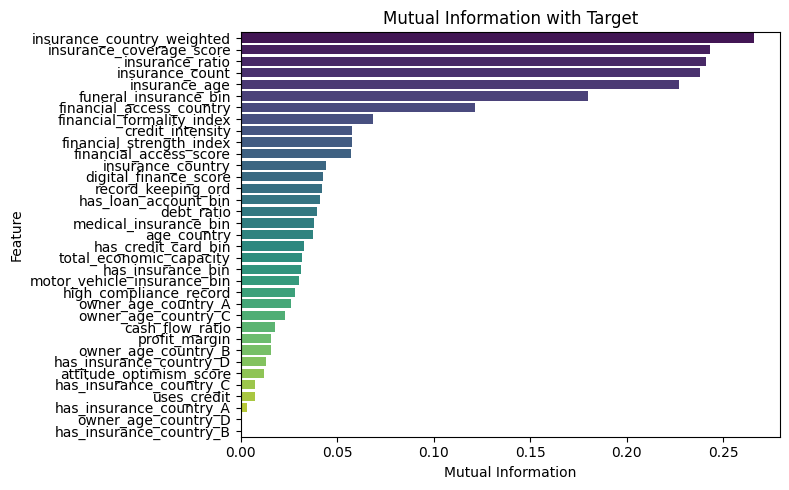

In [23]:

from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



mi_cols = new_cols

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed_array = imputer.fit_transform(X_train[mi_cols])

# Explicitly convert to DataFrame with correct column names
X_imputed = pd.DataFrame(X_imputed_array, columns=mi_cols, index=X_train.index)

# Compute Mutual Information
mi = mutual_info_classif(
    X_imputed,
    y_train,
    discrete_features=False,
    random_state=42
)
print(mi)

# Convert to Series, sort descending
mi_series = pd.Series(mi, index=X_imputed.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')
plt.title("Mutual Information with Target")
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()




In [24]:
mi_threshold = 0.01
selected_features = mi_series[mi_series > mi_threshold].index.tolist()


# Columns to drop: new_cols that were NOT selected
cols_to_drop = list(set(new_cols) - set(selected_features))

# Drop from X_train and X_test
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test  = X_test.drop(columns=cols_to_drop, errors='ignore')

print("Dropped columns:", cols_to_drop)
print("New shape X_train:", X_train.shape)
print("New shape X_test:", X_test.shape)

Dropped columns: ['has_insurance_country_A', 'has_insurance_country_C', 'has_insurance_country_B', 'owner_age_country_D', 'uses_credit']
New shape X_train: (7694, 67)
New shape X_test: (1924, 67)


In [25]:
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

# One-Hot Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Create encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on train and transform train
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Transform test
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert to DataFrame with proper column names
encoded_cols = encoder.get_feature_names_out(categorical_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

# Combine with numeric features
numeric_features = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
X_train_encoded = pd.concat([X_train[numeric_features], X_train_encoded_df], axis=1)
X_test_encoded = pd.concat([X_test[numeric_features], X_test_encoded_df], axis=1)

print("X_train shape:", X_train_encoded.shape)
print("X_test shape:", X_test_encoded.shape)

import re
# Clean column names (in case not done yet)
def clean_column_names(df):
    df.columns = [re.sub(r'[^A-Za-z0-9_]+', '_', col) for col in df.columns]
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols == dup] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train_encoded = clean_column_names(X_train_encoded.copy())
X_test_encoded = clean_column_names(X_test_encoded.copy())

X_train shape: (7694, 175)
X_test shape: (1924, 175)


In [27]:
X_train_encoded.shape

(7694, 175)

In [28]:
X_train_encoded.to_csv('../data/X_train_encoded.csv', index=False)
X_test_encoded.to_csv('../data/X_test_encoded.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

In [ ]:

# =========================
# 4️⃣ Impute missing values
# =========================
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_ft),
                               columns=X_train_ft.columns, index=X_train_ft.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_ft),
                              columns=X_test_ft.columns, index=X_test_ft.index)

# =========================
# 5️⃣ Scale numeric features
# =========================
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed),
                              columns=X_train_imputed.columns, index=X_train_imputed.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed),
                             columns=X_test_imputed.columns, index=X_test_imputed.index)

# =========================
# 6️⃣ Train Random Forest
# =========================
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# =========================
# 7️⃣ Evaluate
# =========================
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Log Loss:", log_loss(y_test, y_pred_proba))

# =========================
# ✅ X_train_scaled and X_test_scaled now contain original + interaction features
# You can use them for any other model
# =========================


,country,owner_age,attitude_stable_business_environment,attitude_worried_shutdown,compliance_income_tax,perception_insurance_doesnt_cover_losses,perception_cannot_afford_insurance,personal_income,business_expenses,business_turnover,...,has_loan_account,has_internet_banking,has_debit_card,future_risk_theft_stock,business_age_months,medical_insurance,funeral_insurance,motivation_make_more_money,uses_friends_family_savings,uses_informal_lender
id,,,,,,,,,,,,,,,,,,,,,
1265,C,27,No,No,No,No,No,40000.0,10000,30000,...,Never had,Never had,Never had,False,<NA>,NaN,NaN,False,NaN,NaN
5303,B,34,Don’t know or N/A,Don’t know or N/A,No,Don't know,Yes,97.0,300,97,...,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,False,Never had,Never had
4512,D,39,Yes,Yes,No,Yes,No,2500.0,4800,288000,...,NaN,NaN,NaN,False,0,Never had,Have now,<NA>,NaN,NaN
7452,D,38,No,Yes,No,Don't know,Don't know,500.0,5400,7200,...,NaN,NaN,NaN,True,2,Never had,Have now,<NA>,NaN,NaN
5765,C,36,Don’t know or N/A,No,No,Don't know,Don't know,700000.0,17000,8400000,...,Never had,Never had,Used to have but don't have now,True,<NA>,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,D,27,Yes,Yes,No,Don't know,No,30.0,1080,1800,...,NaN,NaN,NaN,False,11,Never had,Have now,True,NaN,NaN
9076,D,52,Yes,No,No,No,Yes,NaN,300,2500,...,NaN,NaN,NaN,True,8,Never had,Never had,<NA>,NaN,NaN
5343,A,43,No,No,No,No,Yes,600.0,1000,2500,...,Have now,Never had,Never had,<NA>,8,Never had,Have now,<NA>,Never had,Never had


## AutoFeat

In [ ]:
import pandas as pd
from autofeat import AutoFeatClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss

# 1️⃣ Prepare features and target
X = df.drop(columns=['Target', 'ID', 'id'])
y = df['Target'].map({'Low':0, 'Medium':1, 'High':2})

# 2️⃣ Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3️⃣ Identify numeric and categorical
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# 4️⃣ Impute missing values
num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# 5️⃣ Encode categorical as integers
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# 6️⃣ Apply AutoFeat
af_clf = AutoFeatClassifier(verbose=1, feateng_steps=2)
X_train_af = af_clf.fit_transform(X_train, y_train)
X_test_af = af_clf.transform(X_test)




2025-12-27 00:47:55,958 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 33670 features.
2025-12-27 00:47:55,959 INFO: [AutoFeat] With 7694 data points this new feature matrix would use about 1.04 gb of space.
2025-12-27 00:47:55,965 INFO: [feateng] Step 1: transformation of original features


2025-12-27 00:47:58,516 INFO: [feateng] Generated 110 transformed features from 37 original features - done.
2025-12-27 00:47:58,520 INFO: [feateng] Step 2: first combination of features


2025-12-27 00:48:06,529 INFO: [feateng] Generated 10701 feature combinations from 10731 original feature tuples - done.


2025-12-27 00:48:08,668 INFO: [feateng] Generated altogether 10841 new features in 2 steps
2025-12-27 00:48:08,669 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-12-27 00:48:19,499 INFO: [feateng] Generated a total of 7782 additional features


[featsel] Scaling data...

2025-12-27 00:48:23,896 INFO: [featsel] Feature selection run 1/5


done.


In [ ]:

# Train a simple classifier on AutoFeat features
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Evaluate
y_pred = rf_model.predict(X_test_transformed)
y_pred_proba = rf_model.predict_proba(X_test_transformed)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_proba))
